In [8]:
#!pip install --upgrade torch torchvision
!pip install -q --upgrade fastai

In [9]:
!pip install kaggle -q

In [10]:
!pip install timm -q

#### Only for initial download

In [11]:
import os
if not os.path.exists('./kaggle.json'):
  print('Please copy ./kaggle.json in your notebooks directory')

In [12]:
#!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
from kaggle.api.kaggle_api_extended import KaggleApi
from fastai.vision.all import *

In [14]:
api = KaggleApi()
api.authenticate()
dataset_dir = './dataset'
api.dataset_download_files(dataset='vaclavpechtor/rvl-cdip-small-200', unzip=True, path=dataset_dir)

#### Processing of the dataset

In [15]:
from fastai.vision.all import *
import timm

In [16]:
dataset_path = Path('./dataset/rvl-cdip-small-200/')

In [17]:
dataset_path.ls()

(#2) [Path('dataset/rvl-cdip-small-200/train'),Path('dataset/rvl-cdip-small-200/val')]

In [18]:
# Only run when executing the notebookt the first time or when the data set was changed
failed = verify_images(get_image_files(dataset_path))
failed.map(Path.unlink)
len(failed)

0

In [19]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name="train", valid_name="val"),
    get_y=parent_label,
    item_tfms=Resize(400),
    batch_tfms=aug_transforms(size=244, mult=1, do_flip=False, max_rotate=0, max_zoom=1.0, max_warp=0, max_lighting=0)
)

In [20]:
# data_block.summary(dataset_path)

In [21]:
dls = data_block.dataloaders(dataset_path, bs=32)

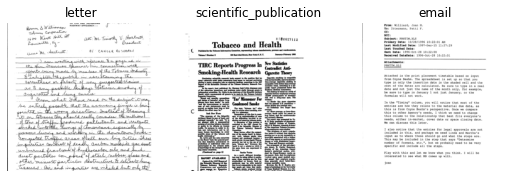

In [22]:
dls.show_batch(nrows=1, ncols=3)

In [23]:
learn = vision_learner(dls, 'convnext_base_384_in22ft1k', metrics=error_rate)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_1k_384.pth" to /root/.cache/torch/hub/checkpoints/convnext_base_22k_1k_384.pth


In [ ]:
#learn.lr_find()

In [24]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time


EOFError: 

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=slice(1e-6, 1e-5))